In [39]:
import pandas as pd
import numpy as np
import os
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [40]:
df=pd.read_csv("C:\\Users\\shsubham\\program\\DATA\\hackerearth\\planecrash\\train.csv")

In [41]:
df.describe()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,41.876406,12.931100,6.564300,65.145324,0.381495,79.969331,3.814900,32001.803282,2.01220,0.255635,6266.554200
std,16.138072,3.539803,6.971982,11.882934,0.121301,2.759739,1.902577,9431.995196,1.03998,0.381128,3610.170288
min,0.000000,1.000000,0.000000,0.000000,0.134000,74.740000,1.000000,831.695553,0.00000,0.000316,2.000000
25%,30.593607,11.000000,2.000000,56.927985,0.293665,77.960000,2.000000,25757.636908,1.00000,0.012063,3139.750000
50%,41.278539,13.000000,4.000000,65.587967,0.365879,79.540000,4.000000,32060.336419,2.00000,0.074467,6280.500000
75%,52.511416,15.000000,9.000000,73.336372,0.451346,81.560000,5.000000,38380.641513,3.00000,0.354059,9391.500000
max,100.000000,23.000000,54.000000,100.000000,0.882648,97.510000,7.000000,64297.651218,5.00000,2.365378,12500.000000


In [42]:
df.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Severity                   10000 non-null object
Safety_Score               10000 non-null float64
Days_Since_Inspection      10000 non-null int64
Total_Safety_Complaints    10000 non-null int64
Control_Metric             10000 non-null float64
Turbulence_In_gforces      10000 non-null float64
Cabin_Temperature          10000 non-null float64
Accident_Type_Code         10000 non-null int64
Max_Elevation              10000 non-null float64
Violations                 10000 non-null int64
Adverse_Weather_Metric     10000 non-null float64
Accident_ID                10000 non-null int64
dtypes: float64(6), int64(5), object(1)
memory usage: 937.6+ KB


In [44]:
df.shape

(10000, 12)

In [45]:
df.columns

Index(['Severity', 'Safety_Score', 'Days_Since_Inspection',
       'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces',
       'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation',
       'Violations', 'Adverse_Weather_Metric', 'Accident_ID'],
      dtype='object')

In [46]:
df['Severity'].value_counts()

Highly_Fatal_And_Damaging                  3049
Significant_Damage_And_Serious_Injuries    2729
Minor_Damage_And_Injuries                  2527
Significant_Damage_And_Fatalities          1695
Name: Severity, dtype: int64

In [47]:
df.dtypes

Severity                    object
Safety_Score               float64
Days_Since_Inspection        int64
Total_Safety_Complaints      int64
Control_Metric             float64
Turbulence_In_gforces      float64
Cabin_Temperature          float64
Accident_Type_Code           int64
Max_Elevation              float64
Violations                   int64
Adverse_Weather_Metric     float64
Accident_ID                  int64
dtype: object

In [48]:
df['Severity'].value_counts()

Highly_Fatal_And_Damaging                  3049
Significant_Damage_And_Serious_Injuries    2729
Minor_Damage_And_Injuries                  2527
Significant_Damage_And_Fatalities          1695
Name: Severity, dtype: int64

In [49]:
df['Severity'].value_counts(normalize=True)

Highly_Fatal_And_Damaging                  0.3049
Significant_Damage_And_Serious_Injuries    0.2729
Minor_Damage_And_Injuries                  0.2527
Significant_Damage_And_Fatalities          0.1695
Name: Severity, dtype: float64

In [50]:
df.nunique()


Severity                       4
Safety_Score                1175
Days_Since_Inspection         23
Total_Safety_Complaints       44
Control_Metric               952
Turbulence_In_gforces       1117
Cabin_Temperature            950
Accident_Type_Code             7
Max_Elevation               4191
Violations                     6
Adverse_Weather_Metric      4258
Accident_ID                10000
dtype: int64

In [51]:
df['Accident_Type_Code'].value_counts()

4    2057
2    1791
3    1752
7    1276
6    1215
1    1171
5     738
Name: Accident_Type_Code, dtype: int64

In [52]:
#for 
#    print(df.groupby('class').size())

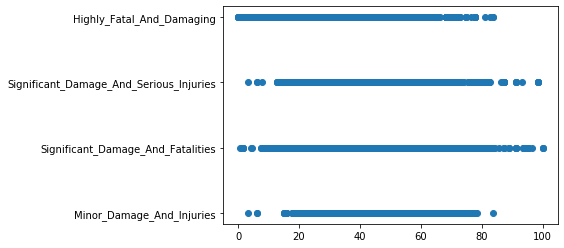

In [53]:
plt.scatter(df['Safety_Score'],df['Severity'])

In [54]:
#df.hist(figsize=(25,20))

Safety_Score                 AxesSubplot(0.125,0.821923;0.0596154x0.0580769)
Days_Since_Inspection      AxesSubplot(0.196538,0.821923;0.0596154x0.0580...
Total_Safety_Complaints    AxesSubplot(0.268077,0.821923;0.0596154x0.0580...
Control_Metric             AxesSubplot(0.339615,0.821923;0.0596154x0.0580...
Turbulence_In_gforces      AxesSubplot(0.411154,0.821923;0.0596154x0.0580...
Cabin_Temperature          AxesSubplot(0.482692,0.821923;0.0596154x0.0580...
Accident_Type_Code         AxesSubplot(0.554231,0.821923;0.0596154x0.0580...
Max_Elevation              AxesSubplot(0.625769,0.821923;0.0596154x0.0580...
Violations                 AxesSubplot(0.697308,0.821923;0.0596154x0.0580...
Adverse_Weather_Metric     AxesSubplot(0.768846,0.821923;0.0596154x0.0580...
Accident_ID                AxesSubplot(0.840385,0.821923;0.0596154x0.0580...
dtype: object

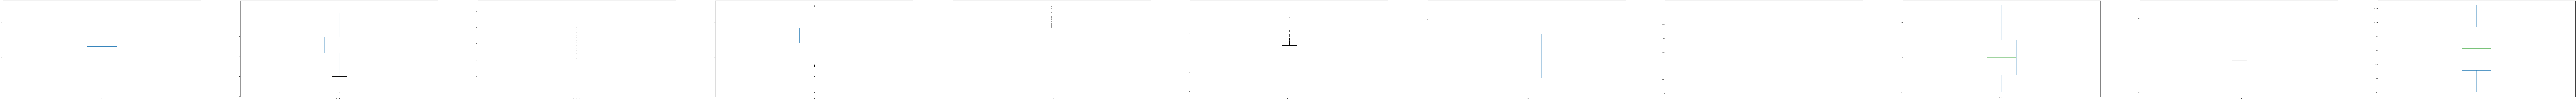

In [55]:
#df.plot(kind='box', subplots=True, layout=(11,11), sharex=False, sharey=False, figsize=(512,256))

In [56]:
from pandas.plotting import scatter_matrix

In [57]:
#scatter_matrix(df,figsize=(50,40))

In [58]:
plt.show()

In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
le_Severity=LabelEncoder()
le_Severity.fit(df['Severity'])
df['Severity']=le_Severity.transform(df['Severity'])

In [61]:
df.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,1,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,1,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,2,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,3,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,2,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [63]:
df_1=df.set_index('Accident_ID')

In [64]:
df_1.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
Accident_ID,,,,,,,,,,,
7570,1,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352
12128,1,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350
2181,2,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364
5946,3,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728
9054,2,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883


In [65]:
y=df_1['Severity']


In [66]:
y.head()

Accident_ID
7570     1
12128    1
2181     2
5946     3
9054     2
Name: Severity, dtype: int32

In [67]:
ind=np.arange(1,11).tolist()

In [68]:
X=df_1.iloc[:,ind]

In [69]:
X.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
Accident_ID,,,,,,,,,,
7570,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352
12128,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350
2181,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364
5946,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728
9054,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883


In [70]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3)

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
import warnings

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

In [74]:
warnings.filterwarnings("ignore",category=FutureWarning)

In [75]:
kfold=StratifiedKFold(n_splits=10,random_state=12,shuffle=True)

In [76]:
lr=LogisticRegression()
lr.fit(X_train,y_train)


C:\Users\shsubham\AppData\Local\Continuum\anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
lr.coef_

array([[-5.42511372e-02, -3.88351260e-02, -9.43711859e-04,
         2.03697957e-02, -7.36886586e-05,  1.82643037e-02,
        -7.21268569e-03,  5.42570775e-06, -8.05889316e-04,
         1.14969101e-03],
       [ 2.36927207e-02,  2.78759280e-02,  3.30128441e-03,
        -1.54399520e-04, -2.14784257e-04, -1.63240378e-02,
        -2.06123705e-02,  6.33973503e-06, -1.72733172e-03,
         2.10398392e-03],
       [ 3.65473876e-02,  1.54153665e-02, -2.57759505e-03,
        -4.77446798e-02,  4.84833425e-04,  2.03352557e-02,
         1.31306334e-02, -2.57809200e-05,  3.63691864e-03,
         1.51187712e-04],
       [-5.98897110e-03, -4.45616859e-03,  2.20022501e-04,
         2.75292836e-02, -1.96360509e-04, -2.22755217e-02,
         1.46944228e-02,  1.40154772e-05, -1.10369761e-03,
        -3.40486264e-03]])

In [78]:
X.columns

Index(['Safety_Score', 'Days_Since_Inspection', 'Total_Safety_Complaints',
       'Control_Metric', 'Turbulence_In_gforces', 'Cabin_Temperature',
       'Accident_Type_Code', 'Max_Elevation', 'Violations',
       'Adverse_Weather_Metric'],
      dtype='object')

In [79]:
lr_predict=lr.predict(X_test)

In [80]:
f1_score(y_test,lr_predict,average='weighted')

0.4237027245711661

In [81]:
svc=SVC()
svc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [82]:
svc_predict=svc.predict(X_test)

In [83]:
f1_score(y_test,svc_predict,average='weighted')

0.14422188217291507

In [84]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [85]:
xgb_predict=xgb.predict(X_test)

In [86]:
f1_score(y_test,xgb_predict,average='weighted')

0.818754148536728

In [87]:
def score(actual,predicted):
    return f1_score(actual,predicted,average='weighted')

In [88]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
#models.append(('CART', DecisionTreeClassifier()))
#models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC(gamma='auto')))
#models.append(('xgboost',XGBClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    #print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    #print(f'name:{name}   result_mean={cv_results.mean()}')
    print('{0}     {1:.2f}'.format(name,cv_results.mean()))

LR     0.55
KNN     0.40


In [89]:
def classification_model_evaluation(models,X_train,y_train,pcv=10,score='accuracy'):
    result={}
    for name,model in models:
        cv_result=cross_val_score(model,X_train,y_train,cv=pcv,scoring=score)
        result[name]=cv_result
        print('{0}     {1:.2f}'.format(name,cv_result.mean()))

In [90]:
classification_model_evaluation(models,X_train, y_train)

LR     0.54
KNN     0.40


In [91]:
print(models)

[('LR', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)), ('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'))]


In [92]:
name_lr,model_lr=models[0]

In [93]:
model_lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [94]:
model_lr.coef_

array([[-1.24191778e-01, -3.79276423e-01,  1.62337348e-03,
         2.29880038e-02, -1.11227923e-04,  9.23321848e-02,
        -6.14577095e-02,  6.50464292e-06, -1.15239055e-02,
         1.00333390e-02],
       [ 6.69570918e-02,  2.11510055e-01,  5.28034474e-03,
        -8.52989557e-03, -2.16090245e-03, -6.87485694e-02,
        -1.96553163e-01,  7.89686361e-07, -1.76600368e-02,
         1.60378167e-02],
       [ 3.31712919e-02,  6.43825864e-02, -7.95154949e-03,
        -4.46826115e-02, -9.46646897e-05, -8.97167649e-03,
         5.53126101e-02, -1.63031014e-05,  1.56712476e-02,
         1.96591456e-03],
       [ 3.41554919e-03, -8.15553412e-03, -6.51447884e-04,
         1.93326402e-02, -2.65104422e-04, -2.98664462e-02,
         1.15664706e-02,  2.10023465e-06, -1.19734463e-03,
        -2.86940889e-03]])

In [95]:
lr_prob_result=model_lr.predict_proba(X_test)

In [96]:
model.fit(X_train,y_train)
xgb_cv_predict= model.predict(X_test)

In [97]:
from xgboost import plot_importance

In [98]:
#plot_importance(model)

In [99]:
xgb_cv_score=f1_score(y_test,xgb_cv_predict,average='weighted')

In [100]:
print(xgb_cv_score)

0.41645151920902845


In [101]:
from sklearn.model_selection import GridSearchCV

In [102]:
{"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }

{'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
 'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
 'min_child_weight': [1, 3, 5, 7],
 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
 'colsample_bytree': [0.3, 0.4, 0.5, 0.7]}

In [103]:
parametres={}

In [104]:
df_result=pd.DataFrame({"original":y_test,"predicted":xgb_cv_predict})

In [105]:
df_result.count()

original     3000
predicted    3000
dtype: int64

In [106]:
df_pr=df_result.where(df_result['original']!=df_result['predicted'])

In [107]:
y_test

Accident_ID
1172     2
7601     3
11868    2
1713     3
6701     2
        ..
10631    3
9444     0
1801     0
9718     3
8898     1
Name: Severity, Length: 3000, dtype: int32

In [108]:
xgb_cv_predict

array([0, 1, 0, ..., 0, 3, 2])

In [109]:
pd.set_option('display.max_rows', 600)

In [110]:
pd.options.display.max_rows

600

In [111]:
df_pr.dropna(inplace=True)

In [112]:
xgb_prob=XGBClassifier()

In [113]:
xgb_prob.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [114]:
xgb_prob_result=xgb_prob.predict_proba(X_test)

In [115]:
xgb_prob_result

array([[0.04864504, 0.16379991, 0.7520375 , 0.03551747],
       [0.02873197, 0.14240979, 0.15955894, 0.6692993 ],
       [0.03717335, 0.56539655, 0.36020872, 0.0372214 ],
       ...,
       [0.6639883 , 0.00380944, 0.00384982, 0.32835245],
       [0.05278218, 0.10502979, 0.0298984 , 0.8122896 ],
       [0.03248147, 0.86515415, 0.04438956, 0.05797487]], dtype=float32)

In [116]:
pd.set_option('display.max_rows', 32000)

In [117]:
pd.options.display.max_rows

32000

In [118]:
#pd_df=pd.DataFrame(prob)

In [119]:
#print(pd_df)

In [120]:
df_result.reset_index()

,Accident_ID,original,predicted
0,1172,2,0
1,7601,3,1
2,11868,2,0
3,1713,3,1
4,6701,2,2
5,10377,2,0
6,4132,2,3
7,7142,2,2
8,8648,1,1
9,10907,2,0


In [121]:
lr_prob=lr.predict_proba(X_test)

In [122]:
lr_prob_df=pd.DataFrame(lr_prob)
lr_prob_df

,0,1,2,3
0,0.053965,0.435992,0.305789,0.204255
1,0.019685,0.300250,0.588222,0.091842
2,0.056976,0.470752,0.214384,0.257888
3,0.388996,0.182631,0.030756,0.397616
4,0.056517,0.374413,0.378806,0.190265
5,0.249170,0.267185,0.037498,0.446147
6,0.099730,0.409468,0.300191,0.190611
7,0.593355,0.146779,0.054943,0.204923
8,0.053632,0.215255,0.661506,0.069607
9,0.357520,0.169041,0.339040,0.134399


In [123]:
columns=df.columns

kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
results.append(cv_results)
names.append(name)
print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

KNN: 0.399714 (0.013489)


In [124]:
columns=df.columns

In [125]:
columns=[]
model_fs=XGBClassifier()
kfold=StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
for i in X_train.columns:
    columns.append(i)
    X_Sel=X_train.loc[:,columns]
    cv_results=cross_val_score(model_fs,X_Sel,y_train,cv=kfold,scoring='accuracy')
    #print('mean: { 0}    std: {1}'.format(cv_results.mean(),cv_results.std()))
    print(' %f (%f)' % ( cv_results.mean(), cv_results.std()))


 0.465857 (0.016969)
 0.754857 (0.012636)
 0.756000 (0.012996)
 0.873571 (0.008262)
 0.874857 (0.006553)
 0.873286 (0.006326)
 0.833429 (0.010694)
 0.831286 (0.011037)
 0.830286 (0.007166)
 0.831000 (0.011867)


In [126]:
print(columns)

['Safety_Score', 'Days_Since_Inspection', 'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces', 'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation', 'Violations', 'Adverse_Weather_Metric']


In [127]:
new_col=['Safety_Score','Days_Since_Inspection','Control_Metric']
 
kfold=StratifiedKFold(n_splits=10,random_state=1,shuffle=True)

X_Sel=X_train.loc[:,new_col]
cv_results=cross_val_score(model_fs,X_Sel,y_train,cv=kfold,scoring='accuracy')
#print('mean: { 0}    std: {1}'.format(cv_results.mean(),cv_results.std()))
print(' %f (%f)' % ( cv_results.mean(), cv_results.std()))



 0.870429 (0.007369)


In [128]:
model_fs.fit(X_Sel,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [129]:
X_test_new=X_test.loc[:,new_col]
New_predict=model_fs.predict(X_test_new)

In [130]:
f1_score(y_test,New_predict,average='weighted')

0.882908537830519

In [131]:
col=['Safety_Score','Days_Since_Inspection','Control_Metric']
X_feature_sel=X_train.loc[:,col]

In [132]:
print(X_feature_sel)

             Safety_Score  Days_Since_Inspection  Control_Metric
Accident_ID                                                     
6401            78.675799                      8       75.843209
5008            55.068493                     12       78.760255
8312            45.068493                     15       72.242479
12094           68.675799                     11       69.006381
1336            11.004566                     18       51.185050
7445            57.488584                     11       62.853236
6196            12.968037                     18       52.096627
3575            70.045662                     11       65.268915
8827            31.963470                     12       73.518687
2550            39.817352                     17       59.298086
3700            40.273973                     10       80.218778
8700             6.347032                     19       75.797630
1307            40.776256                      9       51.914312
7940            47.123288

In [133]:
x=20
y=40
print('X={0} {1}'.format(x,y))

X=20 40


In [134]:
df_test=pd.read_csv("C:\\Users\\shsubham\\program\\DATA\\hackerearth\\planecrash\\test.csv")

In [135]:
df_test_sel=df_test.loc[:,new_col]
df_accid=df_test['Accident_ID']

In [136]:
df_test_sel.head()

,Safety_Score,Days_Since_Inspection,Control_Metric
0,19.497717,16,72.151322
1,58.173516,15,64.585232
2,33.287671,15,64.721969
3,3.287671,21,66.362808
4,10.867580,18,56.107566


In [137]:
df_test.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,19.497717,16,6,72.151322,0.388959,78.32,4,37949.724386,2,0.069692,1
1,58.173516,15,3,64.585232,0.250841,78.60,7,30194.805567,2,0.002777,10
2,33.287671,15,3,64.721969,0.336669,86.96,6,17572.925484,1,0.004316,14
3,3.287671,21,5,66.362808,0.421775,80.86,3,40209.186341,2,0.199990,17
4,10.867580,18,2,56.107566,0.313228,79.22,2,35495.525408,2,0.483696,21


In [138]:
test_predict=model_fs.predict(df_test_sel)

In [139]:
result=pd.DataFrame({'Accident':df_accid,'Severity':test_predict})

In [140]:
result['Severity']=result['Severity'].replace([0,1,2,3],['Highly_Fatal_And_Damaging','Minor_Damage_And_Injuries','Significant_Damage_And_Fatalities','Significant_Damage_And_Serious_Injuries'])

In [141]:
print(result)

      Accident                                 Severity
0            1                Highly_Fatal_And_Damaging
1           10        Significant_Damage_And_Fatalities
2           14  Significant_Damage_And_Serious_Injuries
3           17                Highly_Fatal_And_Damaging
4           21        Significant_Damage_And_Fatalities
5           40        Significant_Damage_And_Fatalities
6           45        Significant_Damage_And_Fatalities
7           50                Highly_Fatal_And_Damaging
8           52                Highly_Fatal_And_Damaging
9           85  Significant_Damage_And_Serious_Injuries
10          95  Significant_Damage_And_Serious_Injuries
11         106  Significant_Damage_And_Serious_Injuries
12         111                Highly_Fatal_And_Damaging
13         123                Highly_Fatal_And_Damaging
14         129        Significant_Damage_And_Fatalities
15         130  Significant_Damage_And_Serious_Injuries
16         132                Highly_Fatal_And_D

In [142]:
le_Severity.classes_

array(['Highly_Fatal_And_Damaging', 'Minor_Damage_And_Injuries',
       'Significant_Damage_And_Fatalities',
       'Significant_Damage_And_Serious_Injuries'], dtype=object)

In [143]:
test_predict_df=pd.DataFrame(test_predict)
result_final__1=test_predict_df.replace([0,1,2,3],['Highly_Fatal_And_Damaging','Minor_Damage_And_Injuries','Significant_Damage_And_Fatalities','Significant_Damage_And_Serious_Injuries'])

In [144]:
#result=pd.DataFrame({'Accident':df_accid,'Severity':result_final__1})

In [145]:
result.to_csv("airplane_accident_prediction1.csv")

In [146]:
#result_final.head()

In [147]:
final_prob=xgb_prob_result+lr_prob_result

In [148]:
print(final_prob)

[[0.06617558 0.63145106 1.01876234 0.28361096]
 [0.03742797 0.48651634 0.59951034 0.87654534]
 [0.06259628 1.10416008 0.50626259 0.32698107]
 ...
 [1.23843255 0.10251813 0.07700417 0.58204515]
 [0.25435394 0.34465013 0.24586497 1.15513092]
 [0.13672387 1.29721729 0.21861556 0.34744333]]


In [149]:
final_prob=final_prob/2

In [150]:
print(final_prob)

[[0.03308779 0.31572553 0.50938117 0.14180548]
 [0.01871399 0.24325817 0.29975517 0.43827267]
 [0.03129814 0.55208004 0.25313129 0.16349053]
 ...
 [0.61921628 0.05125906 0.03850209 0.29102257]
 [0.12717697 0.17232506 0.12293248 0.57756546]
 [0.06836193 0.64860864 0.10930778 0.17372166]]


In [151]:
type(final_prob)

numpy.ndarray

In [152]:
np.amax(final_prob,axis=1)

array([0.50938117, 0.43827267, 0.55208004, ..., 0.61921628, 0.57756546,
       0.64860864])

In [153]:
#final_prob_df=pd.DataFrame(final_prob)

In [154]:
index=np.where(final_prob==np.amax(final_prob))

In [155]:
final_predic=final_prob.argmax(axis=1)

In [156]:
fi_ens=f1_score(y_test,final_predic,average='weighted')

In [157]:
fi_ens

0.805729913541277

In [158]:
from sklearn.ensemble import RandomForestClassifier

In [159]:
rfc=RandomForestClassifier(max_features=2,n_estimators=2)

In [160]:
rfc

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [161]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [162]:
rfc.estimators_

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=2, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=575038084, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=2, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=220967571, splitter='best')]

In [163]:
X_Sel.columns

Index(['Safety_Score', 'Days_Since_Inspection', 'Control_Metric'], dtype='object')

In [164]:
#x_train.colu
rfc.feature_importances_

array([0.20273364, 0.17773412, 0.04062577, 0.16403275, 0.08138001,
       0.05503463, 0.10290809, 0.05327195, 0.02443544, 0.0978436 ])

In [165]:
col=X_train.columns

In [166]:
for i in range(df.shape[1]):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11


In [167]:
rfc.feature_importances_

array([0.20273364, 0.17773412, 0.04062577, 0.16403275, 0.08138001,
       0.05503463, 0.10290809, 0.05327195, 0.02443544, 0.0978436 ])

In [168]:
zipped=zip(rfc.feature_importances_,col)

In [169]:
for value in zipped:
    print(value)

(0.20273364183781464, 'Safety_Score')
(0.17773411840330536, 'Days_Since_Inspection')
(0.040625770709256624, 'Total_Safety_Complaints')
(0.16403274759893627, 'Control_Metric')
(0.08138000603913871, 'Turbulence_In_gforces')
(0.05503463401027104, 'Cabin_Temperature')
(0.10290808906927502, 'Accident_Type_Code')
(0.05327195151829094, 'Max_Elevation')
(0.024435438423383252, 'Violations')
(0.09784360239032823, 'Adverse_Weather_Metric')


In [170]:
(X_Sel.columns)

Index(['Safety_Score', 'Days_Since_Inspection', 'Control_Metric'], dtype='object')

In [171]:
import math

In [172]:
LR_Param={}
#depth_val=np.linspace(4,64,5,endpoint=True)
depth_val=[4,8,16,32]
#num_of_estmators=[10,20,30]
min_samples_leaf_val=[20,40,60,80,100]
max_features_val=[3,2,1]
#DecisionTree_param={'max_depth':depth,max_feature=max_feature_sel,min_sample_leaf=min_sample_leaf_val}
#np.arange is also available


In [173]:
def GridSearchRF(X_train,y_train):
    RandomForest_Param={'max_depth':depth_val,'min_samples_leaf':min_samples_leaf_val,'max_features':max_features_val}
    rfc=RandomForestClassifier()
    grid_search=GridSearchCV(estimator=rfc,param_grid=RandomForest_Param,cv=10)
    grid_search.fit(X_train,y_train)
    print(grid_search.best_params_)
    model=RandomForestClassifier(max_depth=grid_search.best_params_['max_depth'],max_features=grid_search.best_params_['max_features'],min_samples_leaf=grid_search.best_params_['min_samples_leaf'])
    return model

In [174]:
#model=GridSearchRF(X_Sel,y_train)

In [175]:
#model

tree based parameters: max_depth = 5,min_child_weight = 1,gamma = 0,subsample, colsample_bytree = 0.8,scale_pos_weight = 1
uning Regularization Parameters: reg_alpha

In [176]:
#learning_rate_val=[0.01,0.02,0.04,0.08,.1,.2,.4,.8] #default .3
learning_rate_val=[.1,.2]
subsample_val=[.5,.6,.8,1]
colsample_bytree_val=[.5,.7,.9,1]
n_estimators_val=[50,100,200]
#min_child_weight_val=[1,2,3,4]
#objective_val=['binary:logistic','multi:softmax','multi:softprob']

In [177]:
def GridSearchXGBC(X_train,y_train):
    XGB_classifier_param={'learning_rate':learning_rate_val,'subsample':subsample_val,'colsample_bytree':colsample_bytree_val}
    xgbc=XGBClassifier(objective='multi:softmax',booster='gbtree',n_estimators=100,silent=0,learning_rate=.3,min_child_weight=1,max_depth=6,gamma=0,max_delta_setp=0,colsample_bytree=1)
    gs=GridSearchCV(estimator=xgbc,param_grid=XGB_classifier_param,cv=10)
    gs.fit(X_train,y_train)
    print(gs.best_params_)
    model=XGBClassifier(objective='multi:softmax',booster='gbtree',n_estimators=100,silent=0,learning_rate=gs.best_params_['learning_rate'],subsample=gs.best_params_['subsample_val'] ,min_child_weight=1,max_depth=6,gamma=0,max_delta_setp=0,colsample_bytree=gs.best_params_['cosample_bytree'])

In [178]:
from sklearn.ensemble import GradientBoostingClassifier

In [179]:
def GridSearchGBM_1(X_train,y_train,lr=.3,trees=50):
    default_learning_rate=.3
    default_num_of_tree=50
    base_GBM=GradientBoostingClassifier(learning_rate=lr,n_estimators=trees,max_depth=6,max_features='sqrt',min_samples_split=50,min_samples_leaf=10,subsample=1.0,n_iter_no_change=20,validation_fraction=.2)
    max_depth_val=[10,30,50,70,90,20]
    #max_depth_val=[10]
    min_samples_split_val=[4,8,16,32,64,128,256,512]
    #min_samples_split_val=[4]
    tol=1e-4
    parametres={'max_depth':max_depth_val,'min_samples_split':min_samples_split_val}
    grid_model=GridSearchCV(estimator=base_GBM,param_grid=parametres,cv=10)
    grid_model.fit(X_train,y_train)
    return grid_model

In [182]:
model1=GridSearchGBM_1(X_Sel,y_train)

In [183]:
model1.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.3, loss='deviance', max_depth=20,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=10, min_samples_split=16,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=20, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.2, verbose=0,
                           warm_start=False)

In [ ]:
model1.best_estimator_.feature_importances_

In [184]:
n_fe=len(X_Sel.columns)
num_of_features=[n_fe//2,n_fe//3,round(math.sqrt(n_fe))]

In [185]:
num_of_features

[1, 1, 2]

In [186]:
def GridSearchGBM(X_train,y_train,lr=.3,trees=50):
    default_learning_rate=.3
    default_num_of_tree=50
    base_GBM=GradientBoostingClassifier(learning_rate=lr,n_estimators=trees,max_depth=6,max_features='sqrt',min_samples_split=50,min_samples_leaf=10,subsample=1.0,n_iter_no_change=20,validation_fraction=.2)
    #max_depth_val=[10,30,50,70,90,20]
    max_depth_val=[10]
    #min_samples_split_val=[4,8,16,32,64,128,256,512]
    min_samples_split_val=[4]
    n_fe=len(X_Sel.columns)
    max_features_val=[n_fe//2,n_fe//3,round(math.sqrt(n_fe)),n_fe]
    tol=1e-4
    first_tuning={'max_depth':max_depth_val,'min_samples_split':min_samples_split_val,'max_features':max_features_val}
    grid_model=GridSearchCV(estimator=base_GBM,param_grid=first_tuning,cv=10)
    grid_model.fit(X_train,y_train)
    #learning-rate=2-10/num of trees
    #learning_rate_val=[.2,.1,.05,.02,.01]
    learning_rate_val=[.1]
    #n_estimators_val=[50,100,200,400,500,800,1000]
    n_estimators_val=[100,200]
    second_tuning={'learning_rate':learning_rate_val,'n_estimators':n_estimators_val}
    final_model=GridSearchCV(estimator=grid_model.best_estimator_,param_grid=second_tuning,cv=10)
    final_model.fit(X_train,y_train)
    return final_model

In [187]:
model2=GridSearchGBM(X_Sel,y_train)

In [191]:
def GridSearchXGBC(X_train,y_train,lr=.3,trees=50):
    #XGB_classifier_param={'learning_rate':learning_rate_val,'subsample':subsample_val,'colsample_bytree':colsample_bytree_val}
    base_XGBC=XGBClassifier(objective='multi:softmax',booster='gbtree',n_estimators=trees,silent=0,learning_rate=lr,min_child_weight=1,max_depth=6,gamma=0,max_delta_setp=0,colsample_bytree=1)
    max_depth_val=[100]
    #max_depth_val=[10,30,50,70,90,20]
    min_child_weight_val=[1]
    #min_child_weight_val=[1,2,4,8] #equivalent of min_child_leaf in GBM
    #eta=learning_rate
    first_tuning={'max_depth':max_depth_val,'min_child_weight':min_child_weight_val}
    grid_model=GridSearchCV(estimator=base_XGBC,param_grid=first_tuning,cv=10)
    grid_model.fit(X_train,y_train)
    #learning-rate=2-10/num of trees
    #learning_rate_val=[.2,.1,.05,.02,.01]
    learning_rate_val=[.2,.1]
    #n_estimators_val=[50,100,200,400,500,800,1000]
    n_estimators_val=[100,200]
    second_tuning={'learning_rate':learning_rate_val,'n_estimators':n_estimators_val}
    final_model=GridSearchCV(estimator=grid_model.best_estimator_,param_grid=second_tuning,cv=10)
    return final_model
     

In [193]:
model3=GridSearchXGBC(X_Sel,y_train)